In [1]:
import numpy as np

from tqdm import tqdm

# viz
import matplotlib.pyplot as plt

In [2]:
"""

    choose best candidate using the optimal strategy
    
    reject the first n/e applicants where e is the euler number (~2.718) and choose the candidate 
    which is better than the n/e rejected candidates

"""

def choose_candidate(n, reject=np.e):

    # generate a random array of size n
    candidates = np.arange(1, n+1)
    
    # rearange the value position
    np.random.shuffle(candidates)
    
    # define upper bound, optimal solution
    
    if reject == np.e:
        upper_bound = int( round( n/reject ) )
    else:
        upper_bound = int( round( reject*n/100 ) )
    
    # choose the best candidate from the rejected space
    best_from_rejected = np.min( candidates[ : upper_bound] )
    
    # new array with the remaining space
    rest = candidates[ upper_bound : ]
    
    try:
        
        # choose best candidate from the remaining space
    	best_from_remaining = rest[ rest < best_from_rejected][0]
    
    except:
        
        # if there is not best choise return the last option
    	best_from_remaining = candidates[-1]
    
    return best_from_rejected, best_from_remaining
    
#test the function
sim = choose_candidate( n=100 )

print(f'best from rejected: {sim[0]}')
print(f'best from remaining: {sim[1]}')

best from rejected: 3
best from remaining: 1


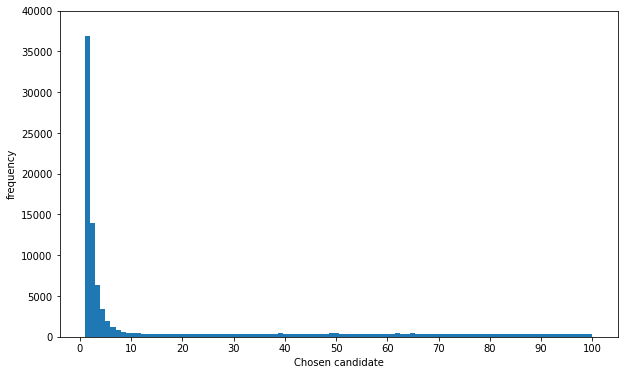

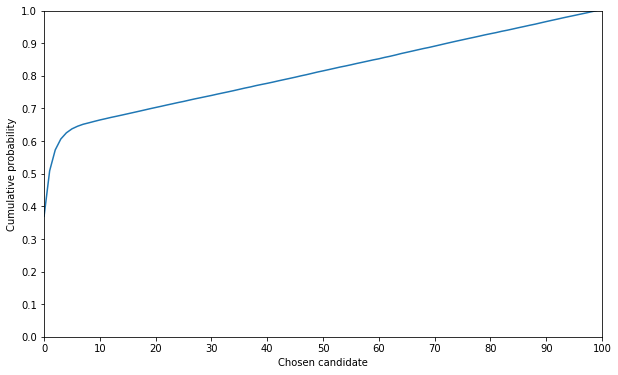

In [3]:
"""

    simulation optimal solution
    
    can be aobserved a convergence towards the best
    
    so in cases in which you do not select the very best at least choose one of the best
    
    the probability of choose the best candidates increase very quickly until the 10 before incresing in a linear fashion

"""

sim = np.array( [ choose_candidate(n=100)[1] for i in range(100000) ] )

plt.figure(figsize=(10, 6))
plt.hist(sim, bins=100)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 40000)
plt.xlabel('Chosen candidate')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(np.histogram(sim, bins=100)[0])/100000)
plt.ylim(0,1)
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Chosen candidate')
plt.ylabel('Cumulative probability')
plt.show()

In [ ]:
"""

    simulation using heuristic upperbounds
    
    the optimal values is between 34% and 40%, i.e. 1/e

"""

best_candidate = []

for r in tqdm(range(5, 101, 5)):
    
    # get simulation
    sim = np.array([choose_candidate(n=100, reject=r)[1] for i in range(100000)])
    
    # frequency of each candidate
    best_candidate.append(np.histogram(sim, bins=100)[0][0]/100000)
    
plt.figure(figsize=(10, 6))
plt.scatter(range(5, 101, 5), best_candidate)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 0.4)
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidate')
plt.grid(True)
plt.axvline(100/np.e, ls='--', c='black')
plt.show()

 50%|█████     | 10/20 [00:18<00:18,  1.86s/it]

In [ ]:
"""

    selecting one of the best candidates (instead of the very best)
    
    list of probabilities for different rejection strategies and specify the percentage of the best candidates to select
    
    the probability of selecting the best candidate increases by rejecting the 20%
    
"""

def get_best_candidates(best_n=1):
    
    best_candidate = []
    
    for r in [1] + list(range(5, 101, 5)):
        
        # get simulation
        sim = np.array([choose_candidate(n=100, reject=r)[1] for i in range(10000)])
        
        best_candidate.append(len(sim[ sim <= best_n ]) / 100)
        
    return best_candidate
    
plt.figure(figsize=(10, 6))
for i in [1, 2, 5, 10]:
    plt.scatter(range(0, 101, 5), get_best_candidates(i), label=str(i))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='No. of best candidates')
plt.grid(True)
plt.tight_layout()
plt.show()